In [73]:
import easyocr
import re
import cv2
from tqdm.notebook import tqdm
from datetime import datetime
from tools.frame_detector import FrameDetector
from matplotlib import pyplot as plt
import matplotlib.patches as patches


In [3]:
video_name = "/home/tzvigr/chaser/test/samples/sample_episode.mp4"
vidcap = cv2.VideoCapture(video_name)
success, image = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
h, w, _ = image.shape
count = 0
frames = []

In [54]:
# get some frames as np array
# pbar = tqdm(total=int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))
for count in tqdm(range(int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT)))):
    if not success:
        break
    if count % (2 * fps) == 0:  # every 2 seconds
        success, image = vidcap.read()
        # get frame timestamp
        timestamp = vidcap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        # print(count/(2*fps),  timestamp) # this converts to seconds
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            frames.append(image[h//2:h, w//2:w])
    else:
        ret = vidcap.grab()
    # count += 1
#     pbar.update(1)
# pbar.close()

  0%|          | 0/77932 [00:00<?, ?it/s]

In [58]:
good_frames = []
reader = easyocr.Reader(['en'], gpu=True)
for i, frame in enumerate(frames):
    result = reader.readtext(frame)
    for (rect, text, confidence) in result:
        if re.match('[1|2][.|:]00', text):
            good_frames.append((i, rect, text, confidence))

In [ ]:
for f in good_frames:
    print(f[1])

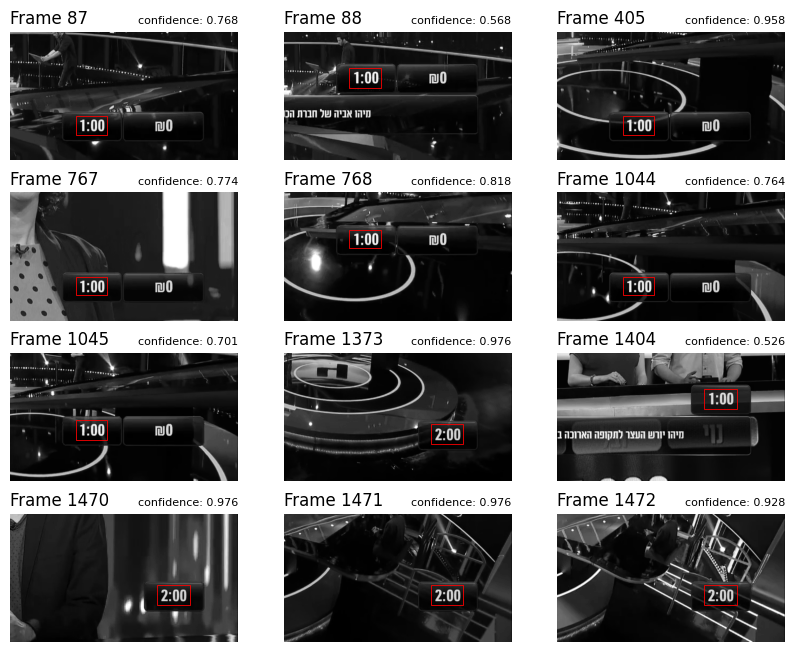

In [100]:
fig, axs = plt.subplots(4, 3, figsize=(10,8))
# fig.tight_layout()
axs = axs.flatten()
for i, frame in enumerate(good_frames):
    x1, y1 = frame[1][0]
    x2, y2 = frame[1][2]
    w, h = x2 - x1, y2 - y1
    if i >= 12:
        break
    axs[i].axis('off')   
    axs[i].set_title(f"Frame {frame[0]}", loc="left")
    axs[i].set_title("confidence: {:.3}".format(frame[3]), fontsize=8, loc="right")
    rect = patches.Rectangle((x1 - 5, y1 - 5), w + 5, h + 5, linewidth=0.6, edgecolor='r', facecolor='none')
    axs[i].add_patch(rect)
    axs[i].imshow(frames[frame[0]], cmap="gray")

    

In [ ]:
detector = FrameDetector(frames)
detector.detect()
print(f"{detector.get_best_results()=}")

In [ ]:
vidcap.release()